In [1]:
import PIL
from PIL import Image
from IPython.display import display
file="readonly/msi_recruitment.gif"
image=Image.open(file)

In [2]:
help(image.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.GifImagePlugin.GifImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename ext

In [3]:
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.GifImagePlugin.GifImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [4]:
#The image save method has a couple of parameters which are interesting. The first called fp,  is the filename 
#we want to save the object to. The second format is interesting. 
#It allows us to change the type of the image but the docs tells us that this should be done automatically by looking at the file 
#extension as well. 
image.save("msi_recruitment.png")
image=Image.open("msi_recruitment.png")
import inspect
inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [5]:
#/The Pillow library also has some nice image filters to add some effects. It does this through the filter function. 
#The filter function takes a filter object and those are all stored in the image filter object.
from PIL import ImageFilter
help(ImageFilter)
#. Before we do this, we have to convert the image to what's called RGB mode. This is a bit magical. Images like Gifs are limited into how many colors can be displayed at once based on the size of the pallet. This is similar to a painter's palette which only has so much room. This is actually a very old image format. 
#If we convert the image into something more sophisticated,we can apply these interesting image transforms

Help on module PIL.ImageFilter in PIL:

NAME
    PIL.ImageFilter

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # standard filters
    #
    # History:
    # 1995-11-27 fl   Created
    # 2002-06-08 fl   Added rank and mode filters
    # 2003-09-15 fl   Fixed rank calculation in rank filter; added expand call
    #
    # Copyright (c) 1997-2003 by Secret Labs AB.
    # Copyright (c) 1995-2002 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Filter
            ModeFilter
            MultibandFilter
                BoxBlur
                BuiltinFilter
                    BLUR
                    CONTOUR
                    DETAIL
                    EDGE_ENHANCE
                    EDGE_ENHANCE_MORE
                    EMBOSS
                    FIND_EDGES
                    Kernel
                    SHARPEN
                    SMOOTH
                    SMOOTH_MORE
          

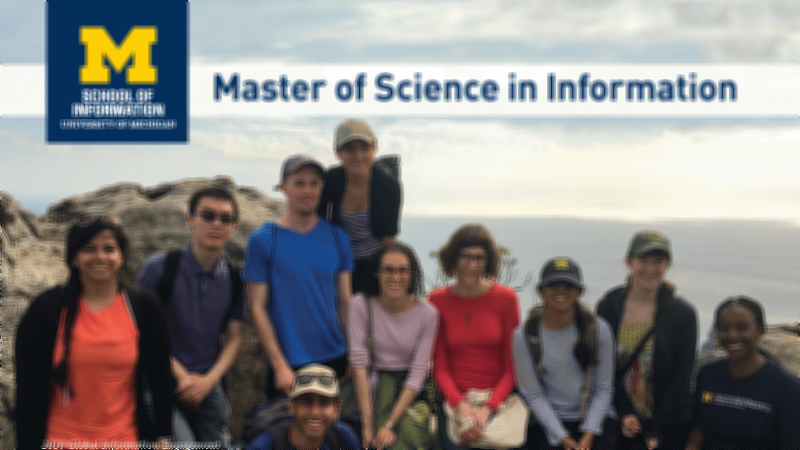

In [6]:
image=image.convert('RGB')
blur_image=image.filter(PIL.ImageFilter.BLUR)
display(blur_image)


The emboss and sharpen filters for instance are interesting. Or for a challenge, check out the box blur or the median filter functions 


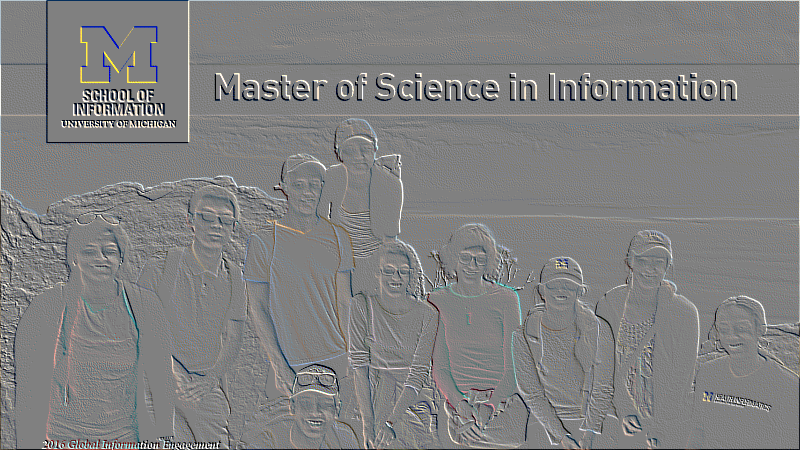

In [7]:
image=image.convert('RGB')
blur_imag=image.filter(PIL.ImageFilter.EMBOSS)
display(blur_imag)


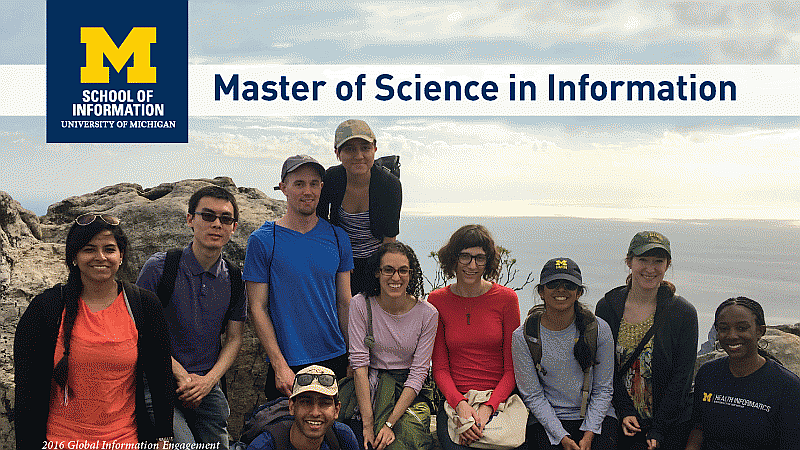

In [8]:
image=image.convert('RGB')
blur_imag=image.filter(PIL.ImageFilter.SHARPEN)
display(blur_imag)


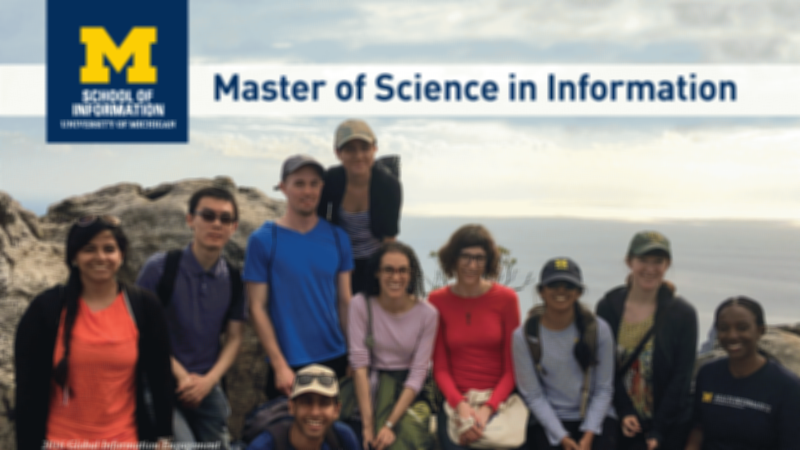

In [9]:
image=image.convert('RGB')
blur_imag=image.filter(PIL.ImageFilter.BoxBlur(2))
display(blur_imag)


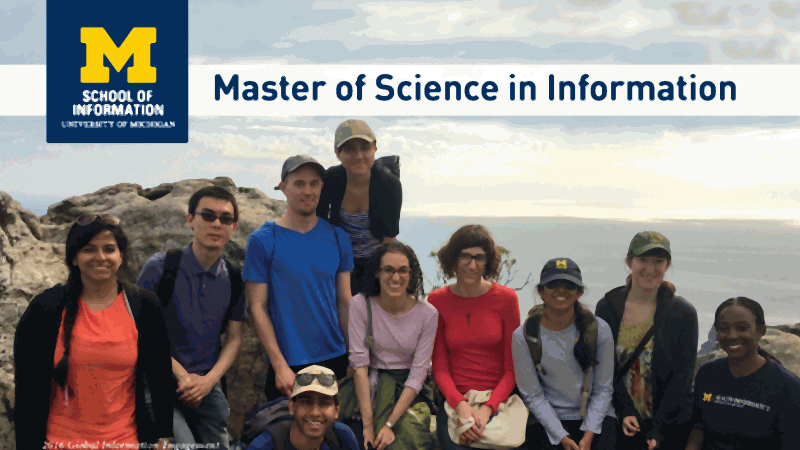

In [10]:
image=image.convert('RGB')
blur_imag=image.filter(PIL.ImageFilter.MedianFilter())
display(blur_imag)


In [23]:
#we'll print the image. We'll use the string formatting to pass in two parameters.
print("{}x{}".format(image.height,image.width))

450x800


In [11]:
help(image.crop
    )

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



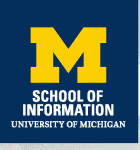

In [19]:
#we see that the first parameter to the function is a tuple, which is the left upper, right and lower values of the x, y coordinates. So the two corners of the image. 
#So help image.crop, we run that and we see that there's a box that we provide. With PIL images, we define the bounding box using the upper left corner and lower right corner. 
#We count the number of pixels out from the upper left corner which is zero zero.crop(width,height)
display(image.crop((50,0,190,150)))

In [22]:
from PIL import ImageDraw
img_d=ImageDraw.Draw(image)
img_d.rectangle((50,0,190,150),fill=None,outline='red')
di